In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA
import seaborn

In [14]:
dataset = pd.read_csv('PCA.csv')
X = dataset.iloc[:, :-1].values


In [15]:
X_std = StandardScaler().fit_transform(X)

In [16]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix n%s' %cov_mat)

Covariance matrix n[[ 1.00012438  0.86158053  0.06855825 ... -0.31518284  0.85146156
   0.73896055]
 [ 0.86158053  1.00012438  0.15488063 ... -0.2903245   0.74215621
   0.86635609]
 [ 0.06855825  0.15488063  1.00012438 ...  0.72747649  0.03936251
   0.12251336]
 ...
 [-0.31518284 -0.2903245   0.72747649 ...  1.00012438 -0.33204912
  -0.31468469]
 [ 0.85146156  0.74215621  0.03936251 ... -0.33204912  1.00012438
   0.86013453]
 [ 0.73896055  0.86635609  0.12251336 ... -0.31468469  0.86013453
   1.00012438]]


In [23]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) 
             for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')

for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
17.169144010332204
12.718589795380487
1.1775554605059546
0.7354095836354944
0.5875266178528442
0.392436509815379
0.3600858168540083
0.12164042085405485
0.1135495785202917
0.079925965577728
0.07318441088608148
0.053872835142702614
0.04976270762478869
0.03991978421552747
0.03473256206918919
0.03598122571816435
0.02654197608232697
0.023593797947327116
0.02339259677223338
0.005737412318959515
0.020926367991898915
0.019926076490595874
0.007093438345993575
0.007987366335269563
0.008979326658424297
0.009272840316974304
0.01068157527362318
0.011383889939443254
0.016016548732695913
0.01523866181852855
0.014816530723164533
0.013923288051121724
0.012459925348436433
0.012939951589475513


In [52]:
pca = PCA(n_components=i)
pca.fit_transform(X)
print(pca.explained_variance_ratio_)


[0.57424128 0.30223122]


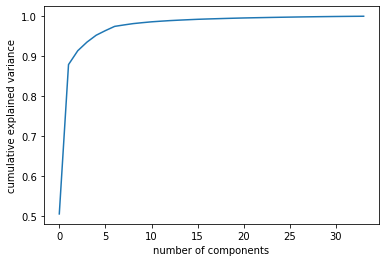

In [54]:
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [37]:
feature = X.T
cov_mat = np.cov(feature)

In [38]:
#Calculating eigenvectors and eigenvalues on covariance matrix
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors n%s' %eig_vecs)
print('nEigenvalues n%s' %eig_vals)

Eigenvectors n[[ 0.21573799  0.01832801 -0.25020742 ... -0.06880016 -0.01319391
  -0.01758412]
 [ 0.2281608   0.04475259  0.1956929  ...  0.21276355  0.10866665
  -0.07578444]
 [ 0.00168712  0.28474476  0.02517484 ... -0.21500624  0.09742941
   0.07080389]
 ...
 [-0.0796675   0.21354728 -0.04577166 ... -0.18777292 -0.03463476
  -0.18597601]
 [ 0.21296104  0.01972501 -0.24402628 ...  0.10252282  0.17013268
  -0.06242826]
 [ 0.24256698  0.04788491  0.21524013 ... -0.13992851 -0.11190472
   0.05208367]]
nEigenvalues n[3.51250645e+00 1.84868128e+00 2.45961520e-01 1.37570003e-01
 8.94355019e-02 8.08676386e-02 5.21493483e-02 2.41525147e-02
 1.68899042e-02 1.52884203e-02 1.11903942e-02 8.23094825e-03
 7.44208721e-03 7.17444670e-03 6.90938403e-03 6.31657995e-03
 5.07896578e-03 4.25834199e-03 4.12762774e-03 3.51729323e-03
 3.36173014e-03 1.09073870e-03 2.96282181e-03 2.87608009e-03
 2.73640345e-03 1.31469350e-03 1.44725187e-03 1.51263576e-03
 1.67493115e-03 1.77170995e-03 1.87487996e-03 1.99587

In [36]:
eigen_vec_ls = []
for i in range(eig_vecs.shape[1]):
    eig1 = feature.T@eig_vecs[:,i]
    eig1 = eig1/eig_vals[i]
    eigen_vec_ls.append(np.ravel(eig1))

In [53]:
sort_idx = np.argsort(eig_vals) ## indices for eigenvalues which are in ascending order
sort_idx = sort_idx[::-1]

eig_val_sum = np.sum(eig_vals)
temp_sum = 1
principal_eig_vec = []
principal_eig_val = []
i=0
while(0.9<temp_sum<0.97*eig_val_sum):
    principal_eig_vec.append(eigen_vec_ls[sort_idx[i]])
    principal_eig_val.append(eig_vals[sort_idx[i]])
    temp_sum += eig_vals[sort_idx[i]]
    i += 1
print("Number of components is {}".format(i))

Number of components is 2
